https://data-analysis-expertise.tistory.com/67

In [ ]:
# !pip install yfinance
# !pip install keras
# !pip install tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

from tensorflow.keras.optimizers import SGD
%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/2조/데이터'

/content/drive/.shortcut-targets-by-id/17w_PgN3OcOQXwOk3ShGZogdbP_KQRrMM/2조/데이터


In [ ]:
smp_df = pd.read_csv('./코드에_사용되는_데이터/smp1/smp_df1.csv',encoding='cp949')
smp_df = smp_df.iloc[:-1][['날짜','최소','최대','평균']]


In [ ]:
smp_df

,날짜,최소,최대,평균
0,2016-01-01,38.26,88.22,70.81
1,2016-01-02,51.90,88.25,75.07
2,2016-01-03,52.30,88.52,77.71
3,2016-01-04,78.06,92.48,89.15
4,2016-01-05,86.31,90.95,90.04
...,...,...,...,...
2391,2022-07-19,126.02,163.60,153.40
2392,2022-07-20,120.54,165.96,150.60
2393,2022-07-21,137.18,162.73,154.59
2394,2022-07-22,121.85,162.54,150.41


In [ ]:
# smp_df = smp_df[456:2282].reset_index(drop=True)

In [ ]:
lng0 = pd.read_csv('/content/drive/MyDrive/2조/데이터/코드에_사용되는_데이터/LNG_price.csv')
lng0

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 22, 2022",38.990,38.990,38.990,38.990,-,2.35%
1,"Jul 21, 2022",38.095,38.095,38.095,38.095,-,-0.20%
2,"Jul 20, 2022",38.170,38.170,38.170,38.170,-,1.83%
3,"Jul 19, 2022",37.485,37.485,37.485,37.485,-,2.43%
4,"Jul 18, 2022",36.595,36.595,36.595,36.595,-,-6.36%
...,...,...,...,...,...,...,...
1393,"Jan 09, 2017",8.800,8.800,8.800,8.800,-,0.00%
1394,"Jan 06, 2017",8.800,8.800,8.800,8.800,-,0.00%
1395,"Jan 05, 2017",8.800,8.800,8.800,8.800,-,0.00%
1396,"Jan 04, 2017",8.800,8.800,8.800,8.800,-,0.00%


In [ ]:
lng = pd.read_csv('/content/drive/MyDrive/2조/데이터/코드에_사용되는_데이터/LNG_월별가격.csv',encoding='cp949')

In [ ]:
fuel = pd.read_csv('/content/drive/MyDrive/2조/데이터/코드에_사용되는_데이터/원유값.csv',encoding='cp949')

In [ ]:
fuel['날짜']=pd.to_datetime(fuel['날짜'])
fuel['날짜'] = fuel['날짜']+np.timedelta64(5,'M')
fuel['날짜'] = fuel['날짜'].dt.strftime('%Y-%m-%d')

In [ ]:
# fuel['날짜'] = fuel['날짜'].astype(str)
# fuel['날짜'] = fuel['날짜'].str[:11]

In [ ]:
fuel

,날짜,두바이유 종가,브렌트유 종가,WTI 종가
0,2022-11-27,109.64,113.80,111.76
1,2022-11-26,106.83,110.98,109.57
2,2022-11-23,104.64,109.10,107.62
3,2022-11-22,102.17,106.46,104.27
4,2022-11-21,112.34,111.74,106.19
...,...,...,...,...
4017,2006-09-23,64.01,NaN,NaN
4018,2006-09-20,63.70,NaN,NaN
4019,2006-09-19,64.40,NaN,NaN
4020,2006-09-18,65.10,NaN,NaN


In [ ]:
#fuel = fuel[60:1634]
fuel = fuel.sort_values(by=["날짜"],ascending=True).reset_index(drop=True)
fuel.columns=['date','두바이유','브렌트유','WTI']

In [ ]:
train=pd.DataFrame()
train['date'] = smp_df['날짜']
train['yearmonth'] = train['date'].str[:7]
train['smp_min'] = smp_df['최소']
train['smp_max'] = smp_df['최대']
train['smp_mean'] = smp_df['평균']

In [ ]:
# train = train.join(lng.set_index('날짜')['일반발전'],on='yearmonth')
# train = train.drop('yearmonth',axis=1)

In [ ]:
train['yearmonth'] = train['date'].str[:7]

In [ ]:
train = train.join(lng.set_index('날짜')['집단발전'],on='yearmonth')
train.drop('yearmonth',axis=1)

,date,smp_min,smp_max,smp_mean,집단발전
0,2016-01-01,38.26,88.22,70.81,12536.22
1,2016-01-02,51.90,88.25,75.07,12536.22
2,2016-01-03,52.30,88.52,77.71,12536.22
3,2016-01-04,78.06,92.48,89.15,12536.22
4,2016-01-05,86.31,90.95,90.04,12536.22
...,...,...,...,...,...
2391,2022-07-19,126.02,163.60,153.40,21673.39
2392,2022-07-20,120.54,165.96,150.60,21673.39
2393,2022-07-21,137.18,162.73,154.59,21673.39
2394,2022-07-22,121.85,162.54,150.41,21673.39


In [ ]:
train

,date,yearmonth,smp_min,smp_max,smp_mean,집단발전
0,2016-01-01,2016-01,38.26,88.22,70.81,12536.22
1,2016-01-02,2016-01,51.90,88.25,75.07,12536.22
2,2016-01-03,2016-01,52.30,88.52,77.71,12536.22
3,2016-01-04,2016-01,78.06,92.48,89.15,12536.22
4,2016-01-05,2016-01,86.31,90.95,90.04,12536.22
...,...,...,...,...,...,...
2391,2022-07-19,2022-07,126.02,163.60,153.40,21673.39
2392,2022-07-20,2022-07,120.54,165.96,150.60,21673.39
2393,2022-07-21,2022-07,137.18,162.73,154.59,21673.39
2394,2022-07-22,2022-07,121.85,162.54,150.41,21673.39


In [ ]:
train = train.join(fuel.set_index('date')['두바이유'],on='date')
train = train.join(fuel.set_index('date')['브렌트유'],on='date')
train = train.join(fuel.set_index('date')['WTI'],on='date')
train = train.fillna(method='ffill')
train = train.fillna(method='bfill')


In [ ]:
train = train.set_index('date')

In [ ]:
train = train.drop('yearmonth',axis=1)

In [ ]:
train.loc['2020-09-19','WTI']= 10

In [ ]:
train = train.iloc[182:,:]

In [ ]:
train

,smp_min,smp_max,smp_mean,집단발전,두바이유,브렌트유,WTI
date,,,,,,,
2016-07-01,63.65,70.62,67.80,9530.74,31.70,41.79,29.88
2016-07-02,63.35,68.73,66.94,9530.74,29.94,40.47,32.28
2016-07-03,55.03,67.70,65.04,9530.74,28.47,40.44,31.72
2016-07-04,38.26,69.45,64.32,9530.74,30.93,40.27,30.89
2016-07-05,63.72,69.61,67.18,9530.74,30.40,39.14,29.69
...,...,...,...,...,...,...,...
2022-07-19,126.02,163.60,153.40,21673.39,90.67,96.84,91.76
2022-07-20,120.54,165.96,150.60,21673.39,90.90,94.05,90.21
2022-07-21,137.18,162.73,154.59,21673.39,90.90,94.05,90.21


In [ ]:
def ts_train_test_normalize(train, time_steps, for_periods):
    """
    input: 
        data: dataframe with dates and price data
    output: 
        X_train, y_train: data from 2013/1/1-2018/12/31 
        X_test : data from 2019- 
        sc :     insantiated MinMaxScaler object fit to the training data 
    """
    # create training and test set 
    ts_train = train['2017-01-01':'2022-04-01'].iloc[:,4:5].values
    ts_test = train['2022-04-01':'2022-07-01'].iloc[:,4:5].values 
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)
    
    # scale the data 
    from sklearn.preprocessing import MinMaxScaler 
    sc = MinMaxScaler(feature_range=(0,1))
    ts_train_scaled = sc.fit_transform(ts_train)
    
    # create training data of s samples and t time steps 
    X_train = [] 
    y_train = [] 
    for i in range(time_steps, ts_train_len-1):
        X_train.append(ts_train_scaled[i-time_steps:i, 0])
        y_train.append(ts_train_scaled[i:i+for_periods, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    
    # Reshaping X_train for efficient modelling 
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1 ))
    
    inputs = pd.concat((train["smp_mean"]['2017-01-01':'2022-04-01'], train["smp_mean"]['2022-04-01':'2022-07-01']), axis=0).values
    inputs = inputs[len(inputs)-len(ts_test)-time_steps:]
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    
    # Preparing X_test 
    X_test = [] 
    for i in range(time_steps, ts_test_len + time_steps - for_periods):
        X_test.append(inputs[i-time_steps:i,0])
    
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    return X_train, y_train , X_test, sc 

In [ ]:
X_train, y_train, X_test, sc = ts_train_test_normalize(train,10,2)
X_train.shape[0], X_train.shape[1]

(1906, 10)

In [ ]:
# actual_pred = pd.DataFrame(columns = ['smp_mean','prediction'])
# actual_pred['smp_mean'] = train.loc['2022-04-01':,'smp_mean'][0:len(preds)]
# actual_pred['prediction'] = preds[:,0]
# from keras.metrics import MeanSquaredError
# m = MeanSquaredError()

# m.update_state(np.array(actual_pred['smp_mean']), np.array(actual_pred['prediction']))
# return (m.result().numpy(), actual_pred.plot())


In [ ]:
def actual_pred_plot(preds):
  actual_pred = pd.DataFrame(columns = ['smp_mean','prediction'])
  actual_pred['smp_mean'] = train.loc['2022-04-01':'2022-07-01','smp_mean'][0:len(preds)]
  actual_pred['prediction'] = preds[:,0]
  from keras.metrics import MeanSquaredError
  m = MeanSquaredError()

  m.update_state(np.array(actual_pred['smp_mean']), np.array(actual_pred['prediction']))
  return (m.result().numpy(), actual_pred.plot())


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def confirm_result(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MSLE = mean_squared_log_error(y_test, y_pred)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred))
    R2 = r2_score(y_test, y_pred)
    
    pd.options.display.float_format = '{:.5f}'.format
    Result = pd.DataFrame(data=[MAE,RMSE, RMSLE, R2],
                         index = ['MAE','RMSE', 'RMSLE', 'R2'],
                         columns=['Results'])
    return Result

In [ ]:
# confirm_result(y_test, y_pred)

In [ ]:
# !pip install tensorflow
import tensorflow as tf

In [ ]:
def GRU_model(X_train, y_train, X_test, sc):
  from keras.models import Sequential
  from keras.layers import Dense, SimpleRNN, GRU
  from tensorflow.keras.optimizers import SGD,Adam,RMSprop
  from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

  #GRU 아키텍처
  my_GRU_model = Sequential()
  my_GRU_model.add(GRU(units = 50,
                       return_sequences = True,
                       input_shape = (X_train.shape[1],1),
                       activation = 'tanh'))
  my_GRU_model.add(Dense(units =5))
  my_GRU_model.add(GRU(units=200,
                       activation = 'tanh'))
  my_GRU_model.add(Dense(units =1))


  #컴파일링
  my_GRU_model.compile(optimizer = SGD(lr = 0.01, decay = 1e-5,
                                       momentum = 0.9, nesterov = False),loss='mse', metrics =['accuracy']) #,metrics=['accuracy'],loss = 'mse'
  # my_GRU_model.compile(optimizer = RMSprop, loss = 'mean_squared_error')
  
  model_path='/content/drive/MyDrive/2조/모델/GRU플라스크용.h5'
  mc1 = ModelCheckpoint(model_path, verbose = 0,  moniter = 'val_acc', save_best_only = True, save_freq="epoch") # moniter = 'val_loss',
  es1 = EarlyStopping(patience = 15,monitor='loss')
  #피팅하기(Fitting)
  my_GRU_model.fit(X_train,y_train,epochs = 200, batch_size = 20, verbose = 0, callbacks=[mc1,es1])
  GRU_prediction = my_GRU_model.predict(X_test)
  GRU_prediction = sc.inverse_transform(GRU_prediction)

  return my_GRU_model, GRU_prediction


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


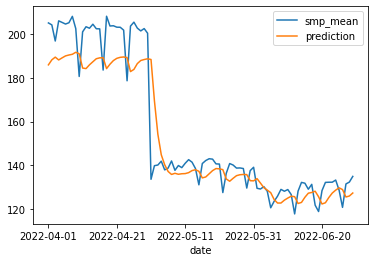

In [ ]:
my_GRU_model, GRU_prediction = GRU_model(X_train, y_train, X_test,sc)
GRU_prediction[0:10]
actual_pred_plot(GRU_prediction)
my_GRU_model.save('/content/drive/MyDrive/2조/모델/GRU플라스크용.h5')

In [ ]:
# from keras.layers.recurrent_v2 import GRU
y_pred_gru = pd.DataFrame(GRU_prediction[:,0])
y_test_gru = pd.DataFrame(train.loc['2022-04-01':'2022-07-01','smp_mean'][0:len(GRU_prediction)])
y_test_gru.reset_index(drop=True, inplace=True)

In [ ]:
y_pred_gru

,0
0,185.891708
1,188.191711
2,189.422531
3,188.138168
4,189.089401
...,...
85,129.780884
86,128.993820
87,125.605804
88,126.048180


In [ ]:
confirm_result(y_test_gru, y_pred_gru)

,Results
MAE,9.10027
RMSE,11.99054
RMSLE,0.07018
R2,0.86401


### 예측값과 실제값 비교

In [ ]:
a = pd.concat([y_test_gru,y_pred_gru], axis=1)

In [ ]:
test_pred = pd.DataFrame(a)

In [ ]:
test_pred.columns

Index(['smp_mean', 0], dtype='object')

In [ ]:
test_pred.rename(columns={'smp_mean' : 'test',
                   0 : 'pred'}, inplace=True)
test_pred

,test,pred
0,205.03000,185.89171
1,204.13000,188.19171
2,196.78000,189.42253
3,205.98000,188.13817
4,205.26000,189.08940
...,...,...
85,128.70000,129.78088
86,120.87000,128.99382
87,131.55000,125.60580
88,132.41000,126.04818


### Promphet

In [ ]:
train['date']=train.index

In [ ]:
# Select only the important features i.e. the date and price
data = train[['date',"smp_mean"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"date":"ds","smp_mean":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
date,,
2016-07-01,2016-07-01,67.80000
2016-07-02,2016-07-02,66.94000
2016-07-03,2016-07-03,65.04000
2016-07-04,2016-07-04,64.32000
2016-07-05,2016-07-05,67.18000


In [ ]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

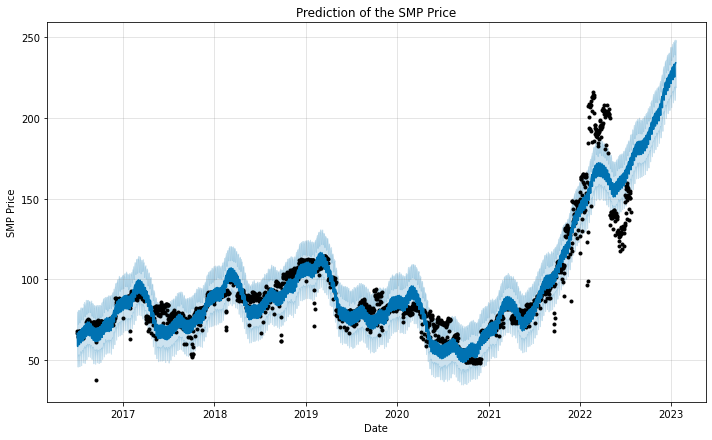

In [ ]:
future = m.make_future_dataframe(periods=180) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the SMP Price")
plt.xlabel("Date")
plt.ylabel("SMP Price")
plt.show()

In [ ]:
predict_price = prediction[['ds','yhat']]
predict_price

,ds,yhat
0,2016-07-01,66.56746
1,2016-07-02,63.44289
2,2016-07-03,58.49726
3,2016-07-04,64.96948
4,2016-07-05,66.46567
...,...,...
2389,2023-01-15,225.37495
2390,2023-01-16,231.87117
2391,2023-01-17,233.37542
2392,2023-01-18,233.71187


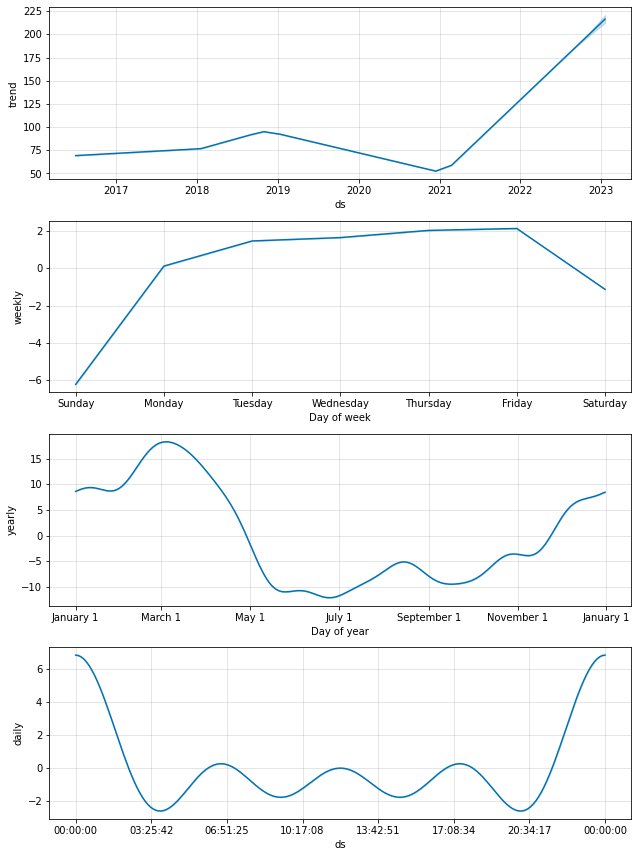

In [ ]:
m.plot_components(prediction)
plt.show()

In [ ]:

from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/2조/모델/GRU최종모델(원유날짜그대로).h5')

In [ ]:
pred1 = pd.read_csv('/content/drive/MyDrive/2조/데이터/코드에_사용되는_데이터/7월분1.csv')

In [ ]:
pred1 = pred1.dropna()

In [ ]:
pred1 = pred1.set_index('date')

In [ ]:
pred1 = pred1.astype(float)

In [ ]:
# model.predict(pred1)

In [ ]:
pred1.shape

(1, 4)

### 모델 불러와 사용하기


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow import keras
import numpy as np
import pandas as pd
import datetime
model = keras.models.load_model('/content/drive/MyDrive/2조/모델/GRU플라스크용.h5')

In [ ]:
fuel = pd.read_csv('/content/drive/MyDrive/2조/데이터/코드에_사용되는_데이터/원유값.csv',encoding='cp949')
fuel['날짜']=pd.to_datetime(fuel['날짜'])
fuel['날짜'] = fuel['날짜']+np.timedelta64(5,'M')
fuel['날짜'] = fuel['날짜'].dt.strftime('%Y-%m-%d')
fuel = fuel[['날짜','두바이유 종가']]
fuel

,날짜,두바이유 종가
0,2022-11-27,109.64000
1,2022-11-26,106.83000
2,2022-11-23,104.64000
3,2022-11-22,102.17000
4,2022-11-21,112.34000
...,...,...
4017,2006-09-23,64.01000
4018,2006-09-20,63.70000
4019,2006-09-19,64.40000
4020,2006-09-18,65.10000


In [ ]:
for i in range(15):
  df = pd.DataFrame(columns=['day'])
  date = pd.date_range(start=datetime.date.today(),end=datetime.date.today() + datetime.timedelta(days=15))
  # date = pd.Series(date1)
  df['day'] = date

In [ ]:
df['day'] = df['day'].astype('str')

In [ ]:
df = df.join(fuel.set_index('날짜')['두바이유 종가'],on='day')
df = df.fillna(method = 'ffill')
df = df.fillna(method = 'bfill')
df = df.set_index('day')

In [ ]:
pred = model.predict(df)

In [ ]:
import joblib
sc = joblib.load('/content/drive/MyDrive/2조/데이터/GRUminmax_scaler.pkl')
result = sc.inverse_transform(pred)m

In [ ]:
result

array([[175.13275],
       [175.12517],
       [175.13768],
       [175.13768],
       [175.13768],
       [175.10173],
       [175.0229 ],
       [174.91425],
       [174.95804],
       [174.8204 ],
       [174.8204 ],
       [174.8204 ],
       [174.7616 ],
       [174.67813],
       [174.89053],
       [174.90132]], dtype=float32)

In [ ]:
# fuel['날짜']=pd.to_datetime(fuel['날짜'])
# fuel['날짜'] = fuel['날짜']+np.timedelta64(5,'M')
# fuel['날짜'] = fuel['날짜'].dt.strftime('%Y-%m-%d')
# fuel = fuel.sort_values(by=["날짜"],ascending=True).reset_index(drop=True)
# fuel.columns=['date','두바이유','브렌트유','WTI']
# fuel = fuel.set_index('date')
# fuel1 = fuel.loc['2022-07-25':'2022-08-05','두바이유']
# fuel1

In [ ]:
# c

In [ ]:
from pickle import dump
dump(sc,open('./GRUminmax_scaler.pkl','wb'))

In [ ]:
import datetime 
start = pd.Timestamp(datetime.date.today(), tz='Asia/Seoul')
start = str(start)[:10]
start

'2022-07-25'

In [ ]:
# start = datetime.date.today() + datetime.timedelta(days=15)
# start

In [ ]:
fuel1 = fuel1.set_index('date')

NameError: ignored

In [ ]:
fuel1.loc[start]

In [ ]:
date_index = pd.date_range('2022-07-01','2022-08-30',freq='D')

In [ ]:
df = []
df.index = date_index

In [ ]:
b = sc.transform(fuel1)

In [ ]:
fuel1['date']=fuel1.index

In [ ]:

date_df = pd.DataFrame(pd.date_range('2022-07-01','2022-08-30', freq='D').strftime('%Y-%m-%d'))
date_df = date_df.set_index(0)
date_df = date_df.join(fuel1.set_index('date')['두바이유'],on=0)
date_df = date_df.fillna(method='bfill')
date_df

In [ ]:
import datetime

In [ ]:
datetime.date.today()

In [ ]:
# for i in range(15):
#   start = pd.Timestamp(datetime.date.today()+ datetime.timedelta(days=i), tz='Asia/Seoul')
#   print(start)

In [ ]:

np.array(date_df.loc['2022-07-01'],date_df.loc['2022-07-02'])

In [ ]:
c = sc.transform(date_df)

In [ ]:
c